# Time series

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

/data/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
AIR_QUALITY_URL = 'https://files.datapress.com/london/dataset/london-average-air-quality-levels/2017-10-09T08:41:22.63/air-quality-london-monthly-averages.csv'

Read in the Air Quality dataset.

In [3]:
aq = pd.read_csv(AIR_QUALITY_URL)

Change the data type of `Month` to `datetime`, and set it as index.

In [4]:
aq['Month'] = pd.to_datetime(aq['Month'], format='%b-%y')
aq.set_index('Month', inplace=True)

Resample at monthly resolution.

In [5]:
aq = aq.resample('M').sum()

Extract the column with PM2.5 estimates.

In [6]:
pm25 = aq.loc[:,'London Mean Roadside:PM2.5 Particulate (ug/m3)'].rename('PM2.5')

Check for missing values.

In [7]:
pm25.isnull().sum()

1

If you found any missing values, 'fill the gaps' by propagating non-missing observations forward.

*Hint*: check the parameter `method` to `fillna`.

In [8]:
pm25.fillna(method='pad', inplace=True)

Plot the time series.

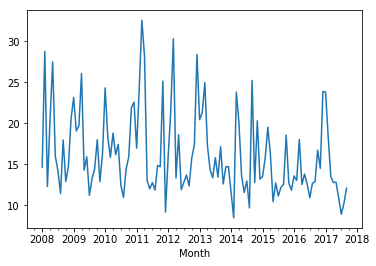

In [9]:
pm25.plot()

Plot the ACF and PACF.

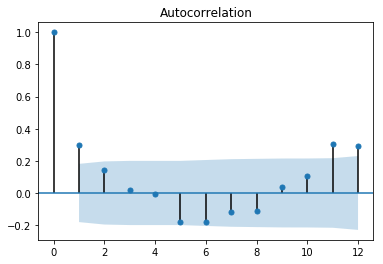

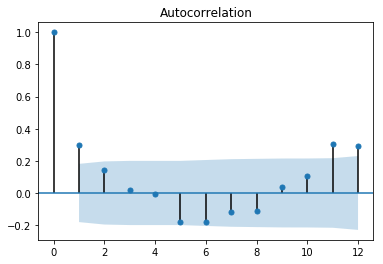

In [10]:
plot_acf(pm25, lags=12)

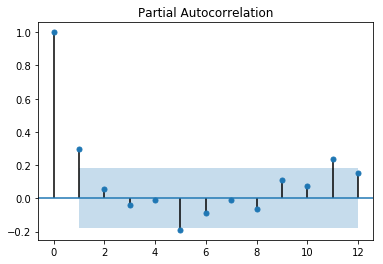

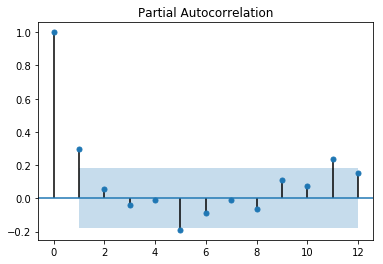

In [11]:
plot_pacf(pm25, lags=12)

Create a new `DataFrame` containing the original time series, and two additional columns for the lagged time series at 1 and 12 months.

*Hint*: use `shift` followed by `dropna`.

In [12]:
pm25_data = pd.DataFrame({
    'pm25': pm25,
    'pm25_shift1': pm25.shift(1),
    'pm25_shift12': pm25.shift(12)
}).dropna()

Build a linear regression model for the original time series using as predictors the two lagged time series.

In [13]:
model1 = smf.glm('pm25 ~ pm25_shift1 + pm25_shift12', data=pm25_data).fit()

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   pm25   No. Observations:                  105
Model:                            GLM   Df Residuals:                      102
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                   20.8890032191
Method:                          IRLS   Log-Likelihood:                -307.03
Date:                Sun, 03 Dec 2017   Deviance:                       2130.7
Time:                        13:53:56   Pearson chi2:                 2.13e+03
No. Iterations:                     2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.8012      1.826      4.271      0.000       4.221      11.381
pm25_shift1      0.2750      0.096      2.879      0.004       0.088       0.462
pm25_shift12     0.2348      0.094      2.499      0.012       0.051       0.419
================================================================================
"""

Plot the ACF and PACF of residuals.

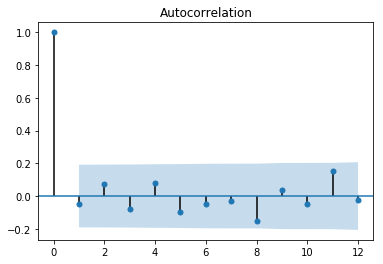

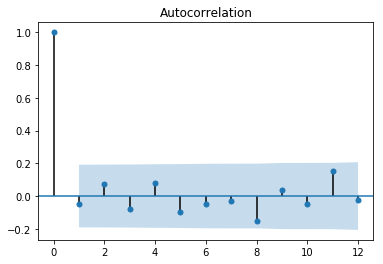

In [15]:
plot_acf(model1.resid_response, lags=12)

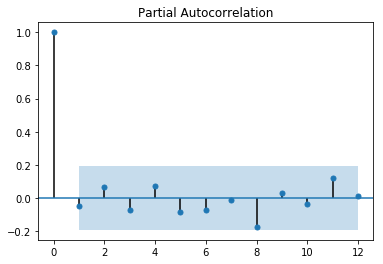

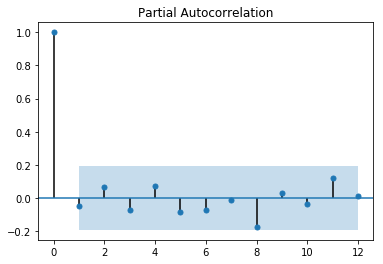

In [16]:
plot_pacf(model1.resid_response, lags=12)

Plot the original time series and the fitted values.

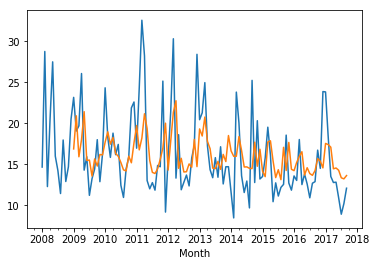

In [17]:
pm25.plot()
model1.fittedvalues.plot()

Build an ARIMA(1, 0, 1) model for the original time series.

In [18]:
model2 = sm.tsa.ARIMA(pm25, (1, 0, 1)).fit()

In [19]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                  117
Model:                     ARMA(1, 1)   Log Likelihood                -349.794
Method:                       css-mle   S.D. of innovations              4.808
Date:                Sun, 03 Dec 2017   AIC                            707.587
Time:                        13:53:57   BIC                            718.636
Sample:                    01-31-2008   HQIC                           712.073
                         - 09-30-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.2426      0.663     24.490      0.000      14.943      17.543
ar.L1.PM2.5     0.4334      0.235      1.848      0.067      -0.026       0.893
ma.L1.PM2.5    -0.1504      0.252     -0.598      0.551      -0.644       0.343
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3075           +0.0000j            2.3075            0.0000
MA.1            6.6473           +0.0000j            6.6473            0.0000
-----------------------------------------------------------------------------
"""

Plot the ACF and PACF of residuals.

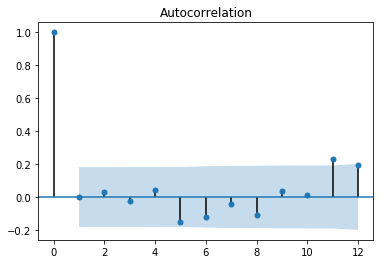

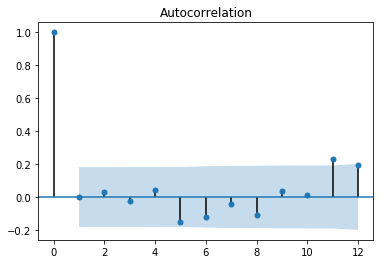

In [20]:
plot_acf(model2.resid, lags=12)

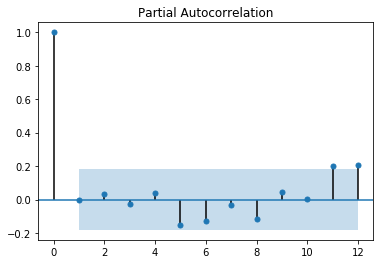

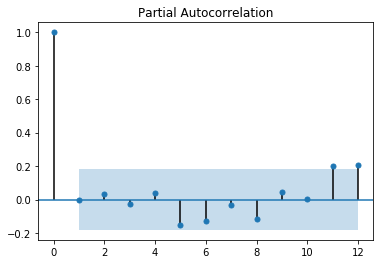

In [21]:
plot_pacf(model2.resid, lags=12)

Plot fitted values and predictions from January 2015 till December 2017.

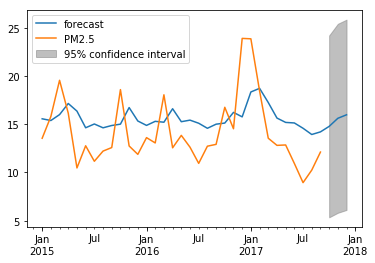

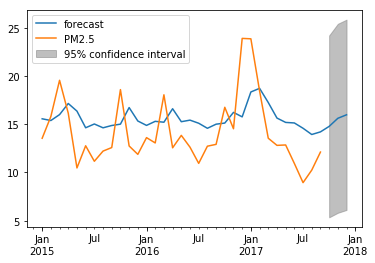

In [22]:
model2.plot_predict('2015-01-31', '2017-12-31')